In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.nn import functional as F
import math

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [3]:
X_train = [trainset[i][0] for i in range(len(trainset))]
Y_train = [trainset[i][1] for i in range(len(trainset))]


X = torch.stack([torch.Tensor(i) for i in X_train])
Y = torch.Tensor(Y_train)

Y = Y.long()

X = X.view(50000, 3*32*32)
B, C = X.shape

n_classes = len(Y.unique())

In [4]:
lr = 0.05

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if device.type == 'cuda':
    torch.backends.cudnn.benchmark = True

stddev = math.sqrt(2.0 / (C + n_classes))

wei = torch.randn(C, n_classes) * stddev
bias = torch.randn(n_classes) * stddev

wei = wei.to(device)
bias = bias.to(device)
X = X.to(device)
Y = Y.to(device)

parameters = [wei, bias]

for p in parameters:
    p.requires_grad = True

In [46]:
lr = 0.085
for e in range(100000):

    logits = X @ wei + bias
    loss = F.cross_entropy(logits, Y)
    
    if e % 10000 == 0:
        print(f'Loss: {loss:.4f}')

    loss.backward()

    for p in parameters:
        p.data += -p.grad * lr

    for p in parameters:
        p.grad.zero_()

Loss: 1.4172
Loss: 1.4168
Loss: 1.4164
Loss: 1.4160
Loss: 1.4156
Loss: 1.4152
Loss: 1.4148
Loss: 1.4145
Loss: 1.4141
Loss: 1.4137


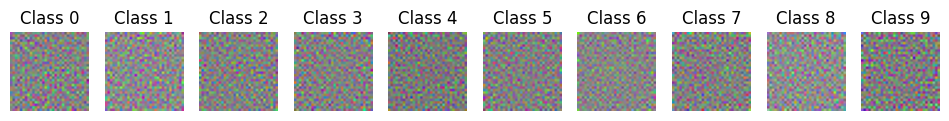

In [42]:
import matplotlib.pyplot as plt

def plot_weights(weights, shape=(3, 32, 32)):
    n_classes = weights.shape[1]
    fig, axes = plt.subplots(1, n_classes, figsize=(12, 12))
    
    for i in range(n_classes):
        class_weights = weights[:, i].detach().cpu().reshape(shape)
        
        # Normalize weights to range 0-1 so they can be properly displayed as an image
        class_weights = (class_weights - class_weights.min()) / (class_weights.max() - class_weights.min())
        
        axes[i].imshow(class_weights.permute(2, 1, 0))
        axes[i].set_title(f'Class {i}')
        axes[i].axis('off')
        
    plt.show()

plot_weights(wei)

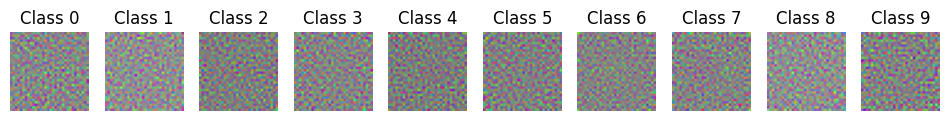

In [47]:
plot_weights(wei)

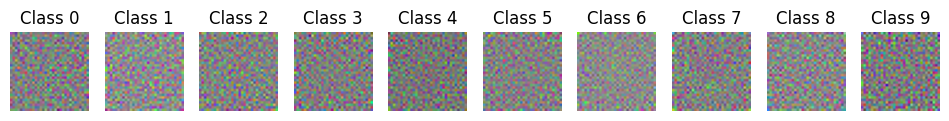

In [31]:
plot_weights(wei)

In [32]:
wei.data

tensor([[ 0.3701,  0.0114,  0.3363,  ..., -0.4802,  0.1598, -0.1767],
        [ 0.0478,  0.0513,  0.3760,  ..., -0.2665, -0.1014,  0.1428],
        [-0.2234,  0.3198, -0.0508,  ...,  0.3178, -0.3522,  0.1782],
        ...,
        [ 0.0702,  0.4365, -0.0729,  ...,  0.1056,  0.4423, -0.5590],
        [-0.0834,  0.1959, -0.7416,  ..., -0.6026,  0.1973,  0.6452],
        [-0.3025,  0.1040, -0.2635,  ..., -0.5138,  0.2814,  0.6279]],
       device='cuda:0')

In [33]:
wei

tensor([[ 0.3701,  0.0114,  0.3363,  ..., -0.4802,  0.1598, -0.1767],
        [ 0.0478,  0.0513,  0.3760,  ..., -0.2665, -0.1014,  0.1428],
        [-0.2234,  0.3198, -0.0508,  ...,  0.3178, -0.3522,  0.1782],
        ...,
        [ 0.0702,  0.4365, -0.0729,  ...,  0.1056,  0.4423, -0.5590],
        [-0.0834,  0.1959, -0.7416,  ..., -0.6026,  0.1973,  0.6452],
        [-0.3025,  0.1040, -0.2635,  ..., -0.5138,  0.2814,  0.6279]],
       device='cuda:0', requires_grad=True)

In [35]:
logits[0]

tensor([-3.3694,  0.5300, -0.2525,  2.2885,  1.1434,  2.5101,  3.1004,  1.7542,
        -5.8745, -0.3779], device='cuda:0', grad_fn=<SelectBackward0>)